<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Prep" data-toc-modified-id="Data-Prep-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Prep</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Convert-Scores-to-Numeric-Scores" data-toc-modified-id="Convert-Scores-to-Numeric-Scores-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Convert Scores to Numeric Scores</a></span></li></ul></li><li><span><a href="#Exploritiory-Analysis" data-toc-modified-id="Exploritiory-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploritiory Analysis</a></span><ul class="toc-item"><li><span><a href="#Score-Distribution" data-toc-modified-id="Score-Distribution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Score Distribution</a></span></li><li><span><a href="#Winning-Scores" data-toc-modified-id="Winning-Scores-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Winning Scores</a></span></li><li><span><a href="#Worst-Socres" data-toc-modified-id="Worst-Socres-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Worst Socres</a></span></li><li><span><a href="#Average-Scores" data-toc-modified-id="Average-Scores-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Average Scores</a></span></li><li><span><a href="#Scoring-by-Year" data-toc-modified-id="Scoring-by-Year-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Scoring by Year</a></span></li><li><span><a href="#Driving-distances" data-toc-modified-id="Driving-distances-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Driving distances</a></span></li><li><span><a href="#Driving-Accuracy" data-toc-modified-id="Driving-Accuracy-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Driving Accuracy</a></span></li><li><span><a href="#Greens-in-Regulation" data-toc-modified-id="Greens-in-Regulation-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Greens in Regulation</a></span></li><li><span><a href="#Scrambling" data-toc-modified-id="Scrambling-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Scrambling</a></span></li><li><span><a href="#Sandsaves" data-toc-modified-id="Sandsaves-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Sandsaves</a></span></li><li><span><a href="#Putting-Average" data-toc-modified-id="Putting-Average-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Putting Average</a></span></li></ul></li></ul></div>

In [1]:
import os.path
import numpy as np
import pandas as pd
from math import sqrt
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [2]:
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.grid'] = True
plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 12

# Data Prep

## Load Data

In [3]:
df2021 = pd.read_csv("2021.csv")
df2019 = pd.read_csv("2019.csv")
df2018 = pd.read_csv("2018.csv")
df2017 = pd.read_csv("2017.csv")
df2016 = pd.read_csv("2016.csv")
df2015 = pd.read_csv("2015.csv")
df2014 = pd.read_csv("2014.csv")
df2013 = pd.read_csv("2013.csv")
df2012 = pd.read_csv("2012.csv")
df2011 = pd.read_csv("2011.csv")
df2010 = pd.read_csv("2010.csv")
df2009 = pd.read_csv("2009.csv")
df2008 = pd.read_csv("2008.csv")
df2007 = pd.read_csv("2007.csv")
df2006 = pd.read_csv("2006.csv")
df2005 = pd.read_csv("2005.csv")
df2004 = pd.read_csv("2004.csv")
df2003 = pd.read_csv("2003.csv")

In [4]:
df = pd.concat([df2019, df2018, df2017, df2016, df2015, df2014, df2013, df2012, df2011, df2010, df2009, df2008,df2006, df2005, df2004, df2003], ignore_index=True)

In [5]:
df = df.rename(columns={"Unnamed: 0": "player"})
df2021 = df2021.rename(columns={"Unnamed: 0": "player"})

## Convert Scores to Numeric Scores

In [6]:
df["score"].replace({"E": "0"}, inplace=True)
df["score"] = pd.to_numeric(df["score"])
df.to_csv('df.csv')

In [7]:
df2021["score"].replace({"E": "0"}, inplace=True)
df2021["score"] = pd.to_numeric(df2021["score"])
df2021.to_csv('df2021.csv')

In [8]:
df = df[['year','avg_driv_dist','driv_acc%','gir%','scrambling%','sandsaves','putting_avg','score']]
df2021 = df2021[['year','avg_driv_dist','driv_acc%','gir%','scrambling%','sandsaves','putting_avg','score']]

# Exploritiory Analysis

## Score Distribution

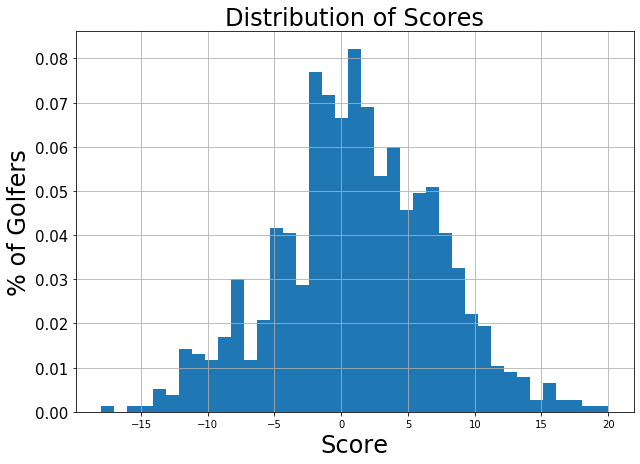

In [9]:
plt.figure(figsize=(10,7))
plt.hist(df['score'], bins = 39, density=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('% of Golfers')
plt.show()

In [10]:
df['score'].sort_values().unique()

array([-18, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,
        -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,
         9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20])

In [11]:
df['score'].nunique()

38

In [12]:
df['score'].mean()

1.2576142131979695

In [13]:
df2021.head()

,year,avg_driv_dist,driv_acc%,gir%,scrambling%,sandsaves,putting_avg,score
0,2021,324.4,71.43,62.50,48.15,20.0,1.822,1
1,2021,323.6,55.36,61.11,53.57,20.0,1.841,5
2,2021,316.5,58.93,61.11,46.43,0.0,1.773,4
3,2021,315.6,75.00,69.44,68.18,75.0,1.840,-6
4,2021,315.1,58.93,66.67,54.17,100.0,1.854,4


## Winning Scores

In [14]:
grouped_df = df.groupby("year")['score']
winning_scores = grouped_df.min()
winning_scores = winning_scores.reset_index()
winning_scores = winning_scores.rename(columns = {'score': 'winning score'}, inplace = False)
winning_scores

,year,winning score
0,2003,-11
1,2004,-9
2,2005,-12
3,2006,-7
4,2008,-8
5,2009,-12
6,2010,-16
7,2011,-14
8,2012,-10
9,2013,-9


In [15]:
winning_scores['winning score'].mean()

-11.0

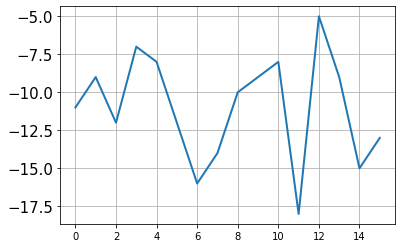

In [16]:
winning_scores['winning score'].plot()

In [17]:
winning_scores['winning score'].std()

3.5402448126271344

## Worst Socres

In [18]:
worst_scores = grouped_df.max()
worst_scores = worst_scores.reset_index()
worst_scores

,year,score
0,2003,17
1,2004,16
2,2005,18
3,2006,12
4,2008,14
5,2009,10
6,2010,14
7,2011,6
8,2012,18
9,2013,16


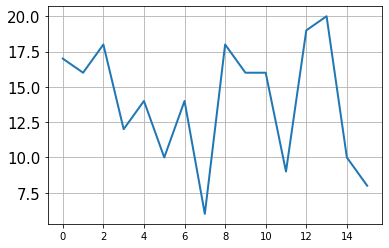

In [19]:
worst_scores['score'].plot()

In [20]:
worst_scores['score'].std()

4.281257603399574

## Average Scores

In [21]:
average_scores = grouped_df.mean()
average_scores = average_scores.reset_index()
average_scores = average_scores.rename(columns = {'score': 'average score'}, inplace = False)
average_scores

,year,average score
0,2003,4.586957
1,2004,2.833333
2,2005,2.111111
3,2006,2.761905
4,2008,3.142857
5,2009,-2.042553
6,2010,-0.090909
7,2011,-2.695652
8,2012,2.087719
9,2013,2.418182


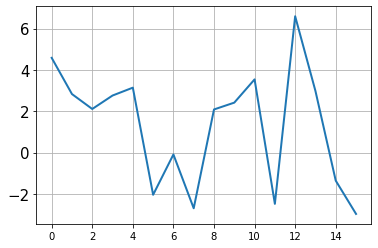

In [22]:
average_scores['average score'].plot()

In [23]:
average_scores['average score'].std()

2.895941922345812

## Scoring by Year

In [24]:
scores_range = winning_scores 
scores_range['worst score'] = worst_scores['score']
scores_range['average score'] = average_scores['average score']
scores_range['range'] = scores_range['worst score'] + abs(scores_range['winning score'])
scores_range

,year,winning score,worst score,average score,range
0,2003,-11,17,4.586957,28
1,2004,-9,16,2.833333,25
2,2005,-12,18,2.111111,30
3,2006,-7,12,2.761905,19
4,2008,-8,14,3.142857,22
5,2009,-12,10,-2.042553,22
6,2010,-16,14,-0.090909,30
7,2011,-14,6,-2.695652,20
8,2012,-10,18,2.087719,28
9,2013,-9,16,2.418182,25


In [25]:
scores_range['range'].mean()

24.9375

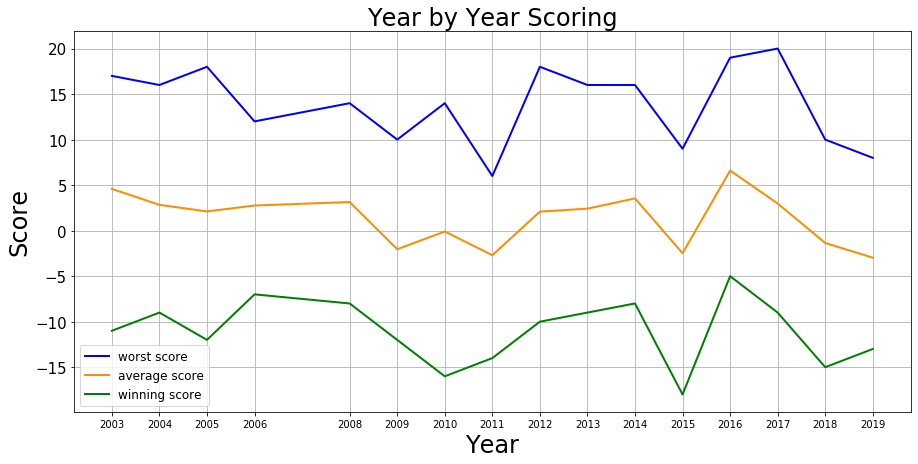

In [26]:
scoring_df = scores_range[['year','worst score','average score','winning score']].set_index('year')
fig, ax = plt.subplots(figsize=(15,7))
scoring_df.plot(ax=ax,color=['blue', 'darkorange', 'green'])
ax.set_title('Year by Year Scoring')
plt.gca().set_xticks(scoring_df.index) 
plt.xlabel('Year')
plt.ylabel('Score')
plt.show()

In [27]:
print("Winning mean: " + str(scores_range['winning score'].mean()))
print("Winning variance: " + str(scores_range['winning score'].var(ddof=0)))
print("Winning std: " + str(scores_range['winning score'].std(ddof=0)))

Winning mean: -11.0
Winning variance: 11.75
Winning std: 3.427827300200522


In [28]:
print("Worst mean: " + str(scores_range['worst score'].mean()))
print("Worst variance: " + str(scores_range['worst score'].var(ddof=0)))
print("Worst std: " + str(scores_range['worst score'].std(ddof=0)))

Worst mean: 13.9375
Worst variance: 17.18359375
Worst std: 4.1453098496976075


In [29]:
print("Average mean: " + str(scores_range['average score'].mean()))
print("Average variance: " + str(scores_range['average score'].var(ddof=0)))
print("Average std: " + str(scores_range['average score'].std(ddof=0)))

Average mean: 1.339324201618328
Average variance: 7.862324641499957
Average std: 2.803983709207305


In [30]:
scores_range['winning score'].corr(scores_range['worst score'])

0.6113907811887205

## Driving distances

In [31]:
grouped_df = df.groupby("year")['avg_driv_dist']
driving_distance = pd.DataFrame(columns = ['min','max'])
driving_distance['min'] = grouped_df.min()
driving_distance['max'] = grouped_df.max()
driving_distance['mean'] = grouped_df.mean()
driving_distance

,min,max,mean
year,,,
2003,264.4,296.0,278.741304
2004,271.0,301.1,284.140476
2005,253.6,292.9,273.104444
2006,263.3,299.3,283.297619
2008,258.0,297.9,277.419048
2009,268.3,308.4,279.985106
2010,270.5,300.8,282.720455
2011,270.4,303.4,285.550000
2012,260.3,292.3,280.122807


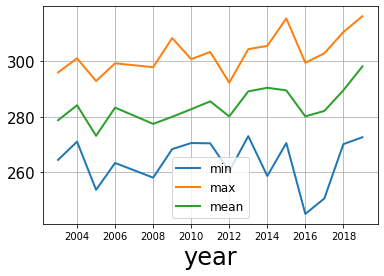

In [32]:
driving_distance.plot()

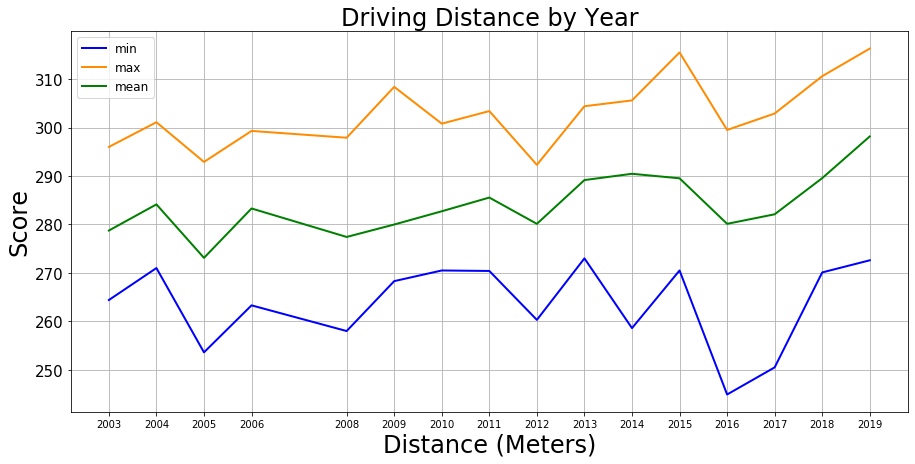

In [33]:
fig, ax = plt.subplots(figsize=(15,7))
driving_distance.plot(ax=ax,color=['blue', 'darkorange', 'green'])
ax.set_title('Driving Distance by Year')
plt.gca().set_xticks(scoring_df.index) 
plt.xlabel('Distance (Meters)')
plt.ylabel('Score')
plt.show()

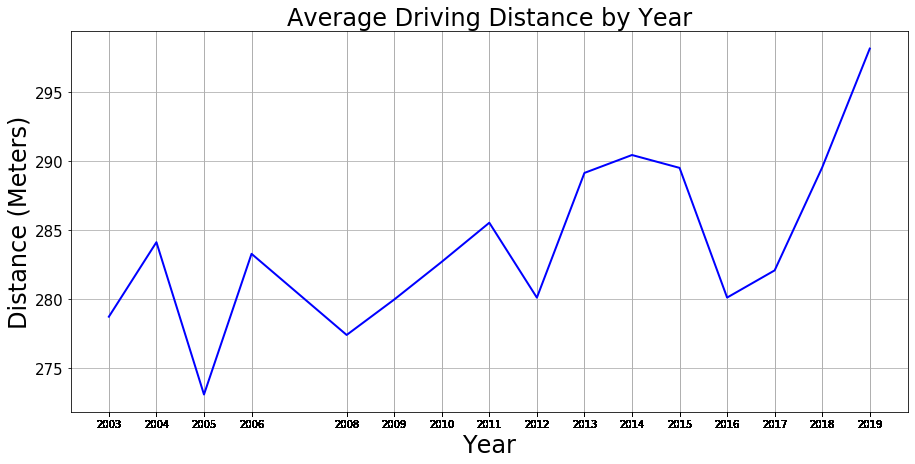

In [34]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby("year")['avg_driv_dist'].mean().plot(ax=ax,color='blue')
ax.set_title('Average Driving Distance by Year')
plt.gca().set_xticks(df.year) 
plt.xlabel('Year')
plt.ylabel('Distance (Meters)')
plt.show()

## Driving Accuracy

In [35]:
grouped_df = df.groupby("year")['driv_acc%']
driving_acc = pd.DataFrame(columns = ['min','max'])
driving_acc['min'] = grouped_df.min()
driving_acc['max'] = grouped_df.max()
driving_acc['mean'] = grouped_df.mean()
driving_acc

,min,max,mean
year,,,
2003,44.64,85.71,69.176304
2004,46.43,83.93,65.561905
2005,55.36,82.14,69.683333
2006,53.57,83.93,69.770476
2008,57.14,85.71,71.598571
2009,50.00,89.29,72.492340
2010,53.57,89.29,72.767727
2011,53.57,85.71,68.050435
2012,53.57,85.71,72.054912


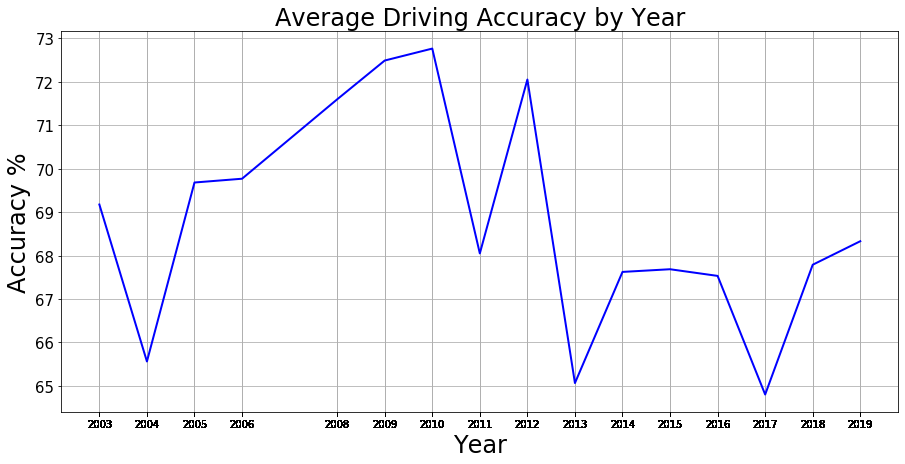

In [36]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby("year")['driv_acc%'].mean().plot(ax=ax,color='blue')
ax.set_title('Average Driving Accuracy by Year')
plt.gca().set_xticks(df.year) 
plt.xlabel('Year')
plt.ylabel('Accuracy %')
plt.show()

## Greens in Regulation

In [37]:
grouped_df = df.groupby("year")['gir%']
gir = pd.DataFrame(columns = ['min','max'])
gir['min'] = grouped_df.min()
gir['max'] = grouped_df.max()
gir['mean'] = grouped_df.mean()
gir

,min,max,mean
year,,,
2003,47.22,69.44,58.303261
2004,48.61,73.61,61.508333
2005,48.61,80.56,63.333778
2006,48.61,76.39,62.070476
2008,52.78,72.22,62.070238
2009,52.78,76.39,65.366383
2010,54.17,80.56,65.625000
2011,56.94,79.17,67.150217
2012,48.61,80.56,62.597368


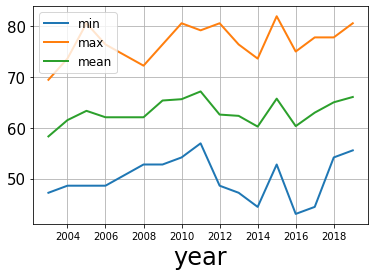

In [38]:
gir.plot()

## Scrambling

In [39]:
grouped_df = df.groupby("year")['scrambling%']
scrambling = pd.DataFrame(columns = ['min','max'])
scrambling['min'] = grouped_df.min()
scrambling['max'] = grouped_df.max()
scrambling['mean'] = grouped_df.mean()
scrambling

,min,max,mean
year,,,
2003,31.82,76.47,59.118478
2004,32.00,75.00,58.270714
2005,37.04,73.08,59.298889
2006,40.00,75.00,60.187619
2008,34.38,80.95,56.773333
2009,35.00,82.61,59.642553
2010,42.86,79.17,58.705682
2011,40.00,80.95,56.960870
2012,30.00,74.07,54.720702


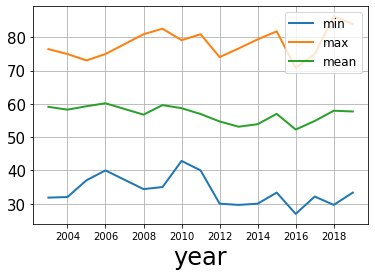

In [40]:
scrambling.plot()

## Sandsaves

In [41]:
grouped_df = df.groupby("year")['sandsaves']
sandsaves = pd.DataFrame(columns = ['min','max'])
sandsaves['min'] = grouped_df.min()
sandsaves['max'] = grouped_df.max()
sandsaves['mean'] = grouped_df.mean()
sandsaves

,min,max,mean
year,,,
2003,0.00,100.00,50.802174
2004,0.00,100.00,37.393095
2005,0.00,100.00,48.951556
2006,0.00,100.00,49.803810
2008,0.00,100.00,47.028571
2009,0.00,100.00,53.471702
2010,0.00,100.00,51.752955
2011,0.00,100.00,44.714348
2012,0.00,100.00,50.744561


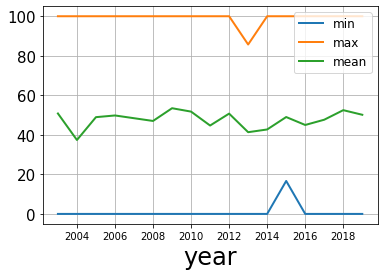

In [42]:
sandsaves.plot()

In [43]:
df.groupby("year")['sandsaves'].nunique()

year
2003    18
2004    14
2005    19
2006    16
2008    18
2009    20
2010    21
2011    19
2012    21
2013    24
2014    19
2015    18
2016    19
2017    18
2018    23
2019    23
Name: sandsaves, dtype: int64

## Putting Average

In [44]:
grouped_df = df.groupby("year")['putting_avg']
putting_avg = pd.DataFrame(columns = ['min','max'])
putting_avg['min'] = grouped_df.min()
putting_avg['max'] = grouped_df.max()
putting_avg['mean'] = grouped_df.mean()
putting_avg

,min,max,mean
year,,,
2003,1.625,2.048,1.825261
2004,1.682,2.024,1.817667
2005,1.627,2.029,1.842178
2006,1.723,1.964,1.832571
2008,1.644,2.000,1.823024
2009,1.600,1.907,1.794170
2010,1.653,1.952,1.823045
2011,1.561,1.951,1.782804
2012,1.647,1.943,1.811807


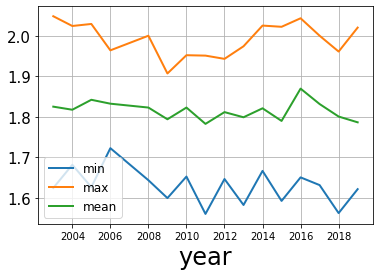

In [45]:
putting_avg.plot()

In [46]:
putting_avg['max'].mean()

1.9914374999999997

In [47]:
putting_avg['min'].mean()

1.6295625